In [1]:
#import 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
import numpy as np

#testing model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


#load dataset
pima = pd.read_excel('/Users/nwilson/Desktop/ewu/Comap MCM 2023/final_knn_logreg_file.xlsx')
print(pima)

      N1_C   N2_C  N3_C     UN2_F  RL  UL  SS  DRAP
0    361.2  18.75  2.33   9094.32   1   1  12     0
1    189.8  16.25  3.33  16015.61   0   0   8     1
2    295.0  25.25  5.67  29608.46   0   0   6     0
3    296.6  14.75  3.33   7971.48   1   0   8     0
4    283.4  27.00  5.00  39565.78   1   0   9     0
..     ...    ...   ...       ...  ..  ..  ..   ...
354  431.4  41.25  9.33  22280.65   0   1  11     1
355  245.0  35.25  4.67  13599.06   0   1   9     0
356  309.0  15.50  2.33  10235.27   0   0   9     1
357  313.4  36.50  6.33  48539.37   0   0  11     0
358  319.0  32.00  7.00  19328.99   0   1  17     1

[359 rows x 8 columns]


In [2]:
#split dataset in features and target variable
X = pima.drop(['DRAP'], axis=1) # Features
y = pima.DRAP # Target variable

In [3]:
#correlation coefficient of pima data 
correlation = pima.corr()

In [4]:
#pearson correlation coefficient 
correlation['DRAP'].sort_values(ascending=False)

DRAP     1.000000
UL       0.182701
SS       0.134985
RL       0.111249
N1_C     0.088272
N2_C     0.027191
N3_C    -0.007301
UN2_F   -0.110544
Name: DRAP, dtype: float64

In [5]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [6]:
#scale training and test data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [7]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [8]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[60,  2],
       [ 9,  1]])

Text(0.5, 257.44, 'Predicted label')

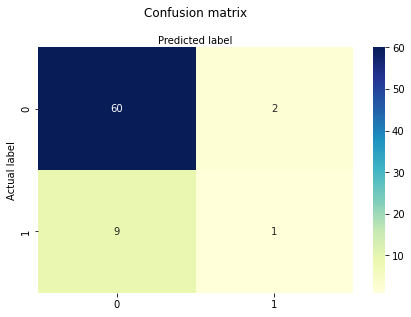

In [9]:
#heatmap of confusion matrix 
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [10]:
#confusion matrix and results 
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[60  2]
 [ 9  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        62
           1       0.33      0.10      0.15        10

    accuracy                           0.85        72
   macro avg       0.60      0.53      0.53        72
weighted avg       0.80      0.85      0.81        72

Accuracy: 0.8472222222222222


In [11]:
#prediction values for indepdent variables
Xnew =[[-1.127884,-0.511388,-0.625408,
      -0.491681,-0.647085,1.253566,-0.021203]]

print(Xnew)

[[-1.127884, -0.511388, -0.625408, -0.491681, -0.647085, 1.253566, -0.021203]]


In [12]:
#predict dependent variable 
predicted=logreg.predict(Xnew)
print(predicted)

[0]
